# SVM using Acoustic features

In [1]:
import pandas as pd
import numpy as np

In [4]:
df = pd.read_csv('OpenSmile_Acoustic_DATA.csv')

df.fillna(0, inplace=True)

df.head()

,frameTime,pcm_RMSenergy_sma_max,pcm_RMSenergy_sma_min,pcm_RMSenergy_sma_range,pcm_RMSenergy_sma_maxPos,pcm_RMSenergy_sma_minPos,pcm_RMSenergy_sma_amean,pcm_RMSenergy_sma_linregc1,pcm_RMSenergy_sma_linregc2,pcm_RMSenergy_sma_linregerrQ,...,F0_sma_de_maxPos,F0_sma_de_minPos,F0_sma_de_amean,F0_sma_de_linregc1,F0_sma_de_linregc2,F0_sma_de_linregerrQ,F0_sma_de_stddev,F0_sma_de_skewness,F0_sma_de_kurtosis,label
0,0,0.013430,0.000315,0.013115,62,31,0.002099,0.000036,0.000259,0.000014,...,62,71,-4.850182e-08,-0.020856,1.053219,170.07320,13.055660,0.139536,13.962990,D
1,0,0.012014,0.000097,0.011916,86,24,0.001798,-0.000005,0.002335,0.000010,...,57,112,9.946342e-09,-0.019791,1.998919,156.33080,12.556900,1.408134,28.568980,D
2,0,0.017445,0.000102,0.017343,87,766,0.002201,-0.000004,0.003788,0.000006,...,597,601,-4.064229e-08,-0.002775,1.064037,679.20410,26.068800,0.078041,5.901169,D
3,0,0.065849,0.003651,0.062198,46,1,0.009701,-0.000070,0.013960,0.000150,...,42,47,2.071429e-08,-0.011110,0.672133,234.11950,15.305970,0.073403,11.027760,D
4,0,0.036867,0.002773,0.034093,145,15,0.005615,0.000016,0.003674,0.000040,...,129,154,-7.481755e-09,-0.004885,0.581368,87.16737,9.342429,1.363256,33.537700,D


In [6]:
columns = df.columns.tolist()

features = [f for f in filter(lambda x: x not in ['label', 'frameTime'], columns)]
target = ['label']

feature_df = df[features]

X = np.asarray(feature_df)

y = np.asarray(df['label'])


In [7]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X)

X = scaler.transform(X)

In [9]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=4)

X_train.shape

(3233, 384)

In [15]:
from sklearn import svm

classifier = svm.SVC(kernel='rbf',C=0.1, gamma=1)

classifier.fit(X_train, y_train)

y_predict = classifier.predict(X_test)

In [16]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           D       0.00      0.00      0.00       106
          ND       0.71      1.00      0.83       254

   micro avg       0.71      0.71      0.71       360
   macro avg       0.35      0.50      0.41       360
weighted avg       0.50      0.71      0.58       360



C:\Users\Ashwin Ram\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [17]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_predict)

0.7055555555555556

# SVM using glottal features

In [2]:
import pandas as pd
import numpy as np

In [66]:
df = pd.read_csv('Glottal features.csv')

df.fillna(0, inplace=True)

In [67]:
columns = df.columns.tolist()
from numpy import nan
features = [f for f in filter(lambda x: x not in ['Label', 'frameTime'], columns)]
target = ['Label']

feature_df = df[features].replace(0, nan)
feature_df.fillna(feature_df.sum(), inplace=True)

X = np.asarray(feature_df)

y = np.asarray(df['Label'])
feature_df.head()


,OQ1,OQ2,NAQ,AQ,ClQ,OQa,QOQ,SQ1,SQ2,DH12,PSP,HRF
0,13.472685,10.142316,0.991781,0.006941,7.703431,2.417849,4.889335,15.031153,6.548111,21.701640,9.005336,-10.397435
1,0.812903,0.646946,0.153377,0.002528,0.415674,0.405545,0.488987,0.965098,0.532640,21.698599,0.275154,0.924383
2,13.472685,10.142316,0.991781,0.006941,7.703431,2.417849,4.889335,15.031153,6.548111,23.301822,9.005336,-8.691624
3,0.710072,0.476530,0.077525,0.001359,0.344136,0.220149,0.140251,0.980445,0.671318,19.577620,0.350059,6.190404
4,13.472685,10.142316,0.991781,0.006941,7.703431,2.417849,4.889335,15.031153,6.548111,20.080114,9.005336,-9.621048


In [68]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X)

X = scaler.transform(X)

In [69]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=4)

X_train.shape

(181, 12)

In [70]:
from sklearn import svm

classifier = svm.SVC(kernel='rbf',C=10, gamma=0.1)

classifier.fit(X_train, y_train)

y_predict = classifier.predict(X_test)

In [71]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           1       1.00      0.25      0.40         8
           2       0.68      1.00      0.81        13

   micro avg       0.71      0.71      0.71        21
   macro avg       0.84      0.62      0.61        21
weighted avg       0.80      0.71      0.66        21



In [72]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_predict)

0.7142857142857143

#  Simple merge   (Acoustic, Glottal and PCA) 

In [2]:
df = pd.read_csv('final1.csv')

df.fillna(0, inplace=True)

df.head()
df.size

97768

In [8]:
import matplotlib.pyplot as plt
columns = df.columns.tolist()

features = [f for f in filter(lambda x: x not in ['label', 'frameTime', 'filename'], columns)]
target = ['label']

feature_df = df[features]

X = np.asarray(feature_df)

y = np.asarray(df['label'])


In [9]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X)

X = scaler.transform(X)
df[features].shape

(202, 481)

No handles with labels found to put in legend.


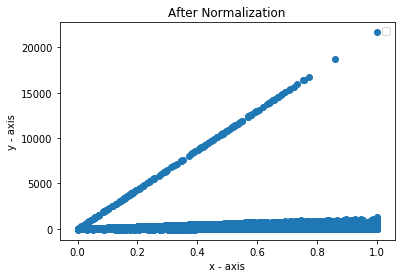

In [112]:
plt.scatter(X, df[features]) 
plt.xlabel('x - axis') 
# naming the y axis 
plt.ylabel('y - axis') 
# giving a title to my graph 
plt.title('After Normalization') 
  
# show a legend on the plot 
plt.legend() 
  
# function to show the plot 
plt.show()


In [10]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=4)

X_train.shape

(181, 481)

In [11]:
from sklearn import svm

classifier = svm.SVC(kernel='rbf', C=100, gamma=0.5)

classifier.fit(X_train, y_train)

y_predict = classifier.predict(X_test)

In [12]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       1.00      0.77      0.87        13
           1       0.73      1.00      0.84         8

   micro avg       0.86      0.86      0.86        21
   macro avg       0.86      0.88      0.86        21
weighted avg       0.90      0.86      0.86        21



In [13]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_predict)

0.8571428571428571

# Hyper Parameter Tunning 

In [29]:
from sklearn.model_selection import GridSearchCV 
from sklearn.svm import SVC 

  
# defining parameter range 
param_grid = {'C': [0.1, 1, 10, 100, 1000],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['rbf','linear']}  
  
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3) 
  
# fitting the model for grid search 
grid.fit(X_train, y_train) 

C:\Users\Ashwin Ram\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


Fitting 3 folds for each of 50 candidates, totalling 150 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV]  C=0.1, gamma=1, kernel=rbf, score=0.5081967213114754, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV]  C=0.1, gamma=1, kernel=rbf, score=0.5166666666666667, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV]  C=0.1, gamma=1, kernel=rbf, score=0.5166666666666667, total=   0.0s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] ......... C=0.1, gamma=1, kernel=linear, score=1.0, total=   0.0s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] ......... C=0.1, gamma=1, kernel=linear, score=1.0, total=   0.0s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV]  C=0.1, gamma=1, kernel=linear, score=0.9833333333333333, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................


[CV]  C=10, gamma=1, kernel=rbf, score=0.6333333333333333, total=   0.0s
[CV] C=10, gamma=1, kernel=linear ....................................
[CV] .......... C=10, gamma=1, kernel=linear, score=1.0, total=   0.0s
[CV] C=10, gamma=1, kernel=linear ....................................
[CV] .......... C=10, gamma=1, kernel=linear, score=1.0, total=   0.0s
[CV] C=10, gamma=1, kernel=linear ....................................
[CV]  C=10, gamma=1, kernel=linear, score=0.9833333333333333, total=   0.0s
[CV] C=10, gamma=0.1, kernel=rbf .....................................
[CV] ........... C=10, gamma=0.1, kernel=rbf, score=1.0, total=   0.0s
[CV] C=10, gamma=0.1, kernel=rbf .....................................
[CV] ........... C=10, gamma=0.1, kernel=rbf, score=1.0, total=   0.0s
[CV] C=10, gamma=0.1, kernel=rbf .....................................
[CV] ........... C=10, gamma=0.1, kernel=rbf, score=1.0, total=   0.0s
[CV] C=10, gamma=0.1, kernel=linear ..................................

[CV]  C=1000, gamma=1, kernel=rbf, score=0.5737704918032787, total=   0.0s
[CV] C=1000, gamma=1, kernel=rbf .....................................
[CV]  C=1000, gamma=1, kernel=rbf, score=0.6166666666666667, total=   0.0s
[CV] C=1000, gamma=1, kernel=rbf .....................................
[CV]  C=1000, gamma=1, kernel=rbf, score=0.6333333333333333, total=   0.0s
[CV] C=1000, gamma=1, kernel=linear ..................................
[CV] ........ C=1000, gamma=1, kernel=linear, score=1.0, total=   0.0s
[CV] C=1000, gamma=1, kernel=linear ..................................
[CV] ........ C=1000, gamma=1, kernel=linear, score=1.0, total=   0.0s
[CV] C=1000, gamma=1, kernel=linear ..................................
[CV]  C=1000, gamma=1, kernel=linear, score=0.9833333333333333, total=   0.0s
[CV] C=1000, gamma=0.1, kernel=rbf ...................................
[CV] ......... C=1000, gamma=0.1, kernel=rbf, score=1.0, total=   0.0s
[CV] C=1000, gamma=0.1, kernel=rbf .......................

[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    2.7s finished
C:\Users\Ashwin Ram\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': [0.1, 1, 10, 100, 1000], 'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 'kernel': ['rbf', 'linear']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=3)

# SequentialFeatureSelector (Acoustic features + Glottal features + PCA)

<img src="sequentialModelDiagram.png">

In [91]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.svm import SVC 
classifier = SVC(gamma='auto', C=10)
# Sequential Forward Selection(sfs)
feature_selector = SFS(SVC(kernel='rbf', C=1000, gamma='auto'),
           k_features=20,
           forward=True,
           verbose=2,
           scoring='roc_auc',
           cv=4)

In [92]:
feature_selector.fit(X_train, y_train)
feature_selector.k_feature_idx_  

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 481 out of 481 | elapsed:   14.0s finished

[2020-11-22 12:37:03] Features: 1/20 -- score: 1.0[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 480 out of 480 | elapsed:    6.3s finished

[2020-11-22 12:37:09] Features: 2/20 -- score: 1.0[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 479 out of 479 | elapsed:    6.3s finished

[2020-11-22 12:37:16] Features: 3/20 -- score: 1.0[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:  

(0, 1, 2, 3, 6, 7, 8, 9, 10, 11, 12, 13, 15, 18, 19, 20, 22, 23, 24, 30)

In [93]:
filtered_features= df[features].columns[list(feature_selector.k_feature_idx_)]
filtered_features

Index(['Unnamed: 0', 'pcm_RMSenergy_sma_max', 'pcm_RMSenergy_sma_min',
       'pcm_RMSenergy_sma_range', 'pcm_RMSenergy_sma_amean',
       'pcm_RMSenergy_sma_linregc1', 'pcm_RMSenergy_sma_linregc2',
       'pcm_RMSenergy_sma_linregerrQ', 'pcm_RMSenergy_sma_stddev',
       'pcm_RMSenergy_sma_skewness', 'pcm_RMSenergy_sma_kurtosis',
       'pcm_fftMag_mfcc_sma[1]_max', 'pcm_fftMag_mfcc_sma[1]_range',
       'pcm_fftMag_mfcc_sma[1]_amean', 'pcm_fftMag_mfcc_sma[1]_linregc1',
       'pcm_fftMag_mfcc_sma[1]_linregc2', 'pcm_fftMag_mfcc_sma[1]_stddev',
       'pcm_fftMag_mfcc_sma[1]_skewness', 'pcm_fftMag_mfcc_sma[1]_kurtosis',
       'pcm_fftMag_mfcc_sma[2]_amean'],
      dtype='object')

In [100]:
from sklearn import svm


classifier = svm.SVC(kernel='rbf',gamma="auto",C=10)

classifier.fit(X_train[filtered_features], y_train)

y_predict = classifier.predict(X_test[filtered_features])

In [101]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       1.00      0.77      0.87        13
           1       0.73      1.00      0.84         8

   micro avg       0.86      0.86      0.86        21
   macro avg       0.86      0.88      0.86        21
weighted avg       0.90      0.86      0.86        21



In [102]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_predict)

0.8571428571428571